### Handwritten Digit recognition using SVM 

#### import useful package

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

#### plot the data and create train and test set

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [120]:
X_train = mnist.train.images.T
Y_train = mnist.train.labels.T

X_test = mnist.test.images.T
Y_test = mnist.test.labels.T

print(X_train.shape, Y_train.shape)

m = 55000
tf.reset_default_graph()

(784, 55000) (10, 55000)


[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


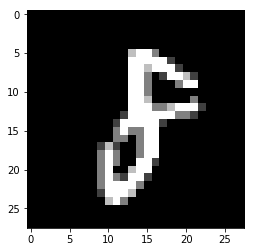

In [121]:
#plot the data
index = 30
image = X_train[:,index]

plt.imshow(image.reshape([28,28]), cmap = 'gray')
print(Y_train[:,index])

#### Create placeholder for input and output

In [122]:
X = tf.placeholder(tf.float32,shape = [784, None], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [10, None], name = 'Output')

W1 = tf.get_variable(shape = [25,784], initializer= tf.contrib.layers.xavier_initializer(seed =1), dtype =tf.float32, name = 'Weight_l1')
b1 = tf.get_variable(shape = [25,1], initializer= tf.zeros_initializer(), dtype = tf.float32, name = 'bias_l1')

W2 = tf.get_variable(shape = [12,25], initializer= tf.contrib.layers.xavier_initializer(seed = 2), dtype = tf.float32, name = 'Weight_l2')
b2 = tf.get_variable(shape = [12,1], initializer= tf.zeros_initializer(), dtype= tf.float32, name ='bias_l2')

W3 = tf.get_variable(shape = [10,12], initializer= tf.contrib.layers.xavier_initializer(seed = 3), dtype = tf.float32, name = 'Weight_l3')
b3 = tf.get_variable(shape = [10,1], initializer= tf.zeros_initializer(), dtype= tf.float32, name ='bias_l3')

#model of deep layer
A0 = X

Z1 = tf.matmul(W1, A0) + b1
A1 = tf.nn.relu(Z1, 'hidden_layer_one')

Z2 = tf.matmul(W2, A1) + b2
A2 = tf.nn.relu(Z2, 'hidden_layer_two')

Z3 = tf.matmul(W3, A2) + b3

In [123]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=tf.transpose(Z3), labels= tf.transpose(Y))
loss = tf.reduce_mean(entropy, name = 'loss')

In [124]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
init = tf.global_variables_initializer()

In [132]:
epoch = 10
batch_size = 512
batch_iteration = 107

iteration_cost = []

In [133]:
loss_vec = []
train_accuracy = []
test_accuracy = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        for j in range(batch_iteration):
            _,l = sess.run([optimizer, loss], {X:X_train[:,j*batch_size:(j+1)*batch_size], Y:Y_train[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(l)
        _,l =  sess.run([optimizer, loss], {X: X_train[:,54784:], Y: Y_train[:,54784:]})
        iteration_cost.append(l)
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

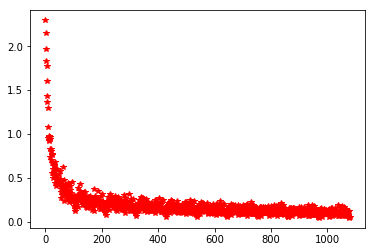

In [134]:
plt.plot(iteration_cost, 'r*')


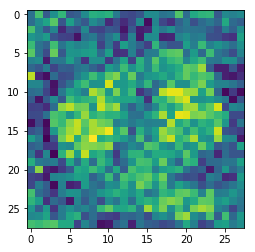

In [135]:
plt.imshow(w_test[0,:].reshape(28,28))

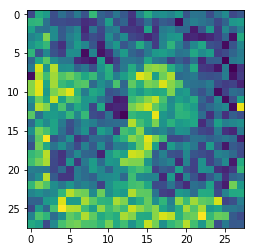

In [136]:
plt.imshow(w_test[6,:].reshape(28,28)*5)

In [137]:
def relu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    exp_z = np.exp(Z)
    sum_exp = np.sum(exp_z, axis = 0)
    return exp_z / sum_exp

test = np.array([[1.0, 20.0], [8.0, -2]])

softmax(test)

array([[  9.11051194e-04,   1.00000000e+00],
       [  9.99088949e-01,   2.78946809e-10]])

In [138]:
correct_no = 0
total_no = 55000

A_0 = X_train

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

z_3 = np.dot(w_3, A_2) + b_3
A_3 = softmax(z_3)

correct_no = np.sum(np.abs(np.argmax(A_3,axis = 0)- np.argmax(Y_train,axis =0)) < 0.5)

print('Training Accuracy ', correct_no / total_no)

Training Accuracy  0.959890909091


In [139]:
correct_no = 0
total_no = 10000

A_0 = X_test

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3,A_2) + b_3
A_3 = softmax(Z_3)

correct_no = np.sum(np.abs(np.argmax(A_3,axis = 0)- np.argmax(Y_test,axis =0)) < 0.5)

print('Testing Accuracy ', correct_no / total_no)

Testing Accuracy  0.9518


#### Comment
#### Neural network performance better in recognize the digit with training accuracy of 96% while testing accuracy 95%.